In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scipy.optimize as opt
from scipy.optimize import curve_fit
import os
import re


In [2]:
def powerlaw(t,K,n,Af,tau):
    return Af*(1-np.exp(-K*np.power(t+tau,n)/Af))#/Af))


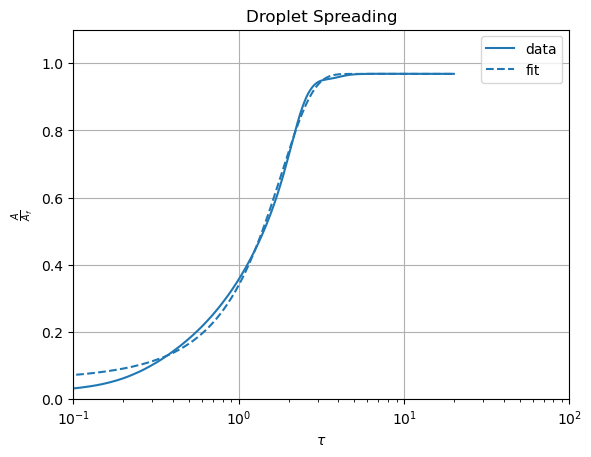

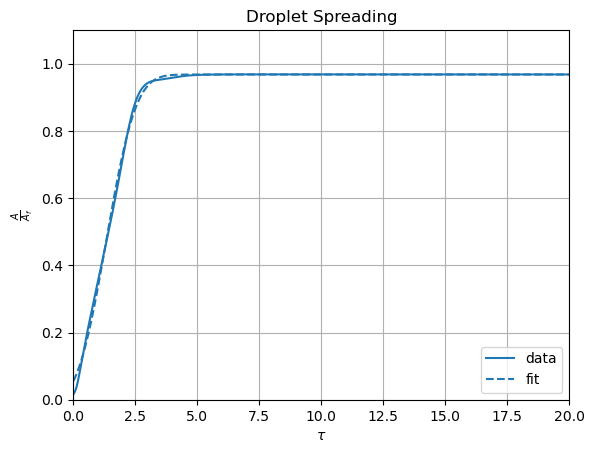

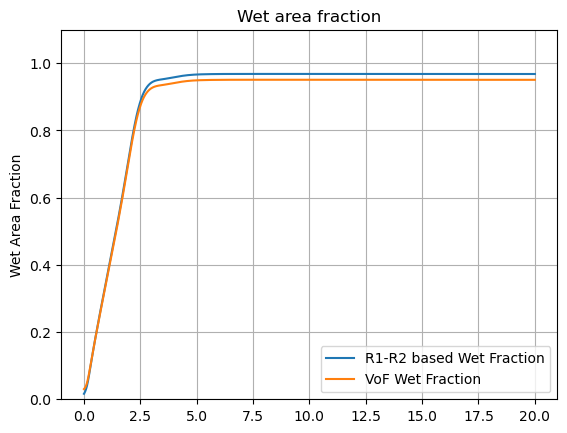

In [13]:
fit_param=np.zeros([1,4])

temp=pd.read_csv('./monitor/dropinfo',header=0,delimiter='\\s+')#,skiprows=1)
temp2=pd.read_csv('./monitor/simulation',header=0,delimiter='\\s+')#,skiprows=1)
data=temp[1:].astype('float32') # Drop first row and interpret data as floating point numbers. 
data2=temp2[1:].astype('float32') # Drop first row and interpret data as floating point numbers. 
    # === Plot Data === #
xdata=data['Time'].to_numpy()
ydata=data['WetAreaFract'].to_numpy()
ydata2=data['VoF_WF'].to_numpy()

ydata=ydata
p=plt.semilogx(xdata,ydata,label='data')
    # === Fit model === #
    #popt, pcov = curve_fit(powerlaw, data['Time'], np.pi*np.power(data['Wetted'],2),[1,0.5,1,8])
popt, pcov = curve_fit(powerlaw, xdata, ydata,bounds=(10**-3,[10,10,10,2]))
fit_param[0,:]=popt
p=plt.semilogx(xdata,powerlaw(xdata,popt[0],popt[1],popt[2],popt[3]),'--',color=p[0].get_color(),label='fit')


plt.ylim([0,1.1])
plt.xlim([1e-1,1e2])
plt.title('Droplet Spreading')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\frac{A}{A_f}$')
plt.legend()
plt.grid()#True,which='Both')
plt.show()

s=plt.plot(xdata,ydata,label='data')
s=plt.plot(xdata,powerlaw(xdata,popt[0],popt[1],popt[2],popt[3]),'--',color=p[0].get_color(),label='fit')

plt.ylim([0,1.1])
plt.xlim([0,20])
plt.title('Droplet Spreading')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\frac{A}{A_f}$')
plt.legend()
plt.grid()#True,which='Both')
plt.show()

plt.plot(xdata,ydata,label='R1-R2 based Wet Fraction')
plt.plot(xdata,ydata2,label='VoF Wet Fraction')
plt.legend()
plt.title('Wet area fraction')
plt.ylim([0,1.1])
plt.ylabel('Wet Area Fraction')
plt.grid()
plt.show()

    

In [ ]:
#K,n,A_f,tau
fit_param

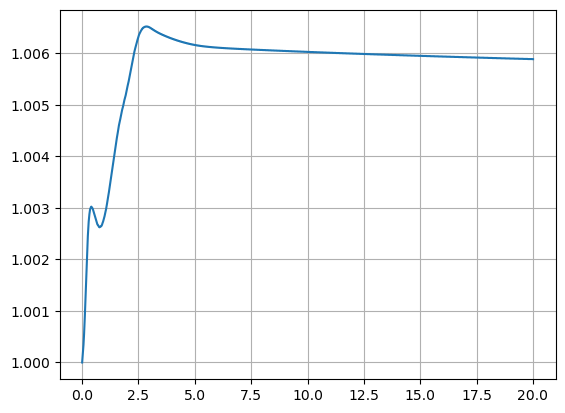

In [17]:
s=plt.plot(xdata,data['Totalvol'].to_numpy()*3/4/np.pi,label='data')
#plt.ylim([40,90])
plt.grid()

In [5]:
data

,Timestep,Time,VOFmax,VOFmin,Totalvol,Dropheight,WetAreaFract,VoF_WF,CL,CA,CA.1,C,alpha
1,0.0,0.000000,1.0,0.0,4.18877,1.984090,0.016370,0.030388,0.000000,2.81812,161.466995,0.016370,0.000000
2,1.0,0.003155,1.0,0.0,4.18884,1.984090,0.016645,0.030572,0.087216,2.81454,161.261002,0.018307,0.016534
3,2.0,0.006311,1.0,0.0,4.18891,1.984090,0.016946,0.030773,0.095531,2.81058,161.033997,0.020293,0.035577
4,3.0,0.009466,1.0,0.0,4.18898,1.984090,0.017269,0.030987,0.102331,2.80629,160.789001,0.022428,0.056095
5,4.0,0.012622,1.0,0.0,4.18905,1.984090,0.017610,0.031215,0.108122,2.80173,160.526993,0.024713,0.077495
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6336,6335.0,19.990000,1.0,0.0,4.21345,0.955839,0.968083,0.950763,-0.000003,1.05375,60.375401,0.968282,-0.000069
6337,6336.0,19.993200,1.0,0.0,4.21345,0.955839,0.968083,0.950763,-0.000025,1.05375,60.375401,0.969563,-0.000510
6338,6337.0,19.996401,1.0,0.0,4.21345,0.955839,0.968083,0.950763,-0.000003,1.05375,60.375401,0.968282,-0.000069
6339,6338.0,19.999500,1.0,0.0,4.21345,0.955839,0.968083,0.950763,-0.000025,1.05375,60.375401,0.969563,-0.000510
